<a href="https://colab.research.google.com/github/jrangelg/Artificial-intelligence/blob/main/Call_Asiatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Balck Scholes



In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
  """
  Calculate the price of a European call option using the Black-Scholes model.

  Args:
    S: Current price of the underlying asset.
    K: Strike price of the option.
    T: Time to maturity (in years).
    r: Risk-free interest rate.
    sigma: Volatility of the underlying asset.

  Returns:
    The price of the call option.
  """
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
  return call_price

# Example usage
S = 100  # Current price of the underlying asset
K = 100  # Strike price of the option
T = 1    # Time to maturity (in years)
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Volatility of the underlying asset

call_price = black_scholes_call(S, K, T, r, sigma)
print(f"The price of the call option is: {call_price}")

# Simulate the price of the call option
S_range = np.linspace(80, 120, 100)
call_prices = [black_scholes_call(s, K, T, r, sigma) for s in S_range]

# Plot the price of the call option
plt.plot(S_range, call_prices)
plt.xlabel("Underlying Asset Price (S)")
plt.ylabel("Call Option Price")
plt.title("Black-Scholes Call Option Price")
plt.grid(True)
plt.show()

# Asiatic call

## Jhonier Rangel

In this test, I will use these methods for finding value options with Asian and lookback options
## Euler Maruyama Method
1. Define a number of simulations, and define an interval discretization
$$
\Delta t = \frac{T}{N}
$$
2. Simulating gaussian noises
$$
W(t_{i+1}) - W(t_i) \sim \mathcal{N}(0, \Delta t)
$$
2. Simulating to behavior
$$
X(t_{i+1}) = X(t_i) + f(X(t_i), t_i) \Delta t + g(X(t_i), t_i) \sqrt{\Delta t} \cdot \xi_i
$$

Where:
- $\Delta t$ is the time step.
- $W(t_{i+1}) - W(t_i)$ is a normally distributed random variable with mean 0 and variance $\Delta t$.
- $X(t_{i+1})$ is the approximation of the solution at time $t_{i+1}$.
- $X(t_i)$ is the value of the solution at time $t_i$.
- $f(X(t_i), t_i)$ is the deterministic part of the equation.
- $g(X(t_i), t_i)$ is the stochastic part of the equation.
- $\xi_i$ is a sample from a standard normal distribution.
- $N$ is the number of time steps.
- $T$ is the total time interval.
- $t_i$ represents the time at step $i$.
#Option Value
$$
\text{Option Value} = e^{-r(T-t)} \cdot \mathbb{E}[\text{Payoff}]
$$

Where:
- **Option Value:** represents the value of the option.
- \(e\) is the base of the natural logarithm.
- \(r\) is the risk-free interest rate.
- \(T\) is the time to expiration.
- $\mathbb{E}[\text{Payoff}]$ is the expected value of the option's payoff.

Proof:
The option value can be expressed as the present value of the expected payoff, discounted at the risk-free interest rate. The present value formula is given by:

$$
\text{Present Value} = \frac{1}{e^{r(T-t)}}
$$

Where:
- \(r\) is the risk-free interest rate.
- \(t\) is the time period.

In the context of option pricing, we apply this present value formula to the expected payoff of the option:

$$
\text{Option Value} = \frac{1}{e^{r(T-t)}} \cdot \mathbb{E}[\text{Payoff}]
$$

This equation incorporates both the risk-free rate and exponential discounting to calculate the option's value. The risk-free rate reflects the time value of money, as the value of money decreases over time due to interest, and \(e^{-rT}\) discounts the expected future payoff to its present value.

**Asian Call Option Value:**
$$
C_{\text{Asian}} = e^{-rT} \cdot \left(\frac{1}{N} \sum_{i=1}^{N} S_i - K\right)^+
$$

**Asian Put Option Value:**
$$
P_{\text{Asian}} = e^{-rT} \cdot \left(K - \frac{1}{N} \sum_{i=1}^{N} S_i\right)^+
$$

Where:
- **C_{\text{Asian}}** represents the value of the Asian call option.
- **P_{\text{Asian}}** represents the value of the Asian put option.
- **e** is the base of the natural logarithm.
- **r** is the risk-free interest rate.
- **T** is the time to expiration.
- **N** is the number of averaging periods or observations.
- **S_i** represents the price of the underlying asset at each observation.
- **K** is the strike price of the option.
- **(x)^+** denotes the positive part of the expression, i.e., \((x)^+ = \max(x, 0)\).

These equations are used to calculate the values of Asian call and put options, where the payoff depends on the average price of the underlying asset over a specified number of observation periods. The options are priced by taking the present value of the positive part of the difference between the average price and the strike price, discounted by the risk-free rate.
## Asian option
\begin{align*}
\textbf{Asian Call Option Value:} & \quad C_{\text{Asian}} = e^{-rT} \cdot \left(\frac{1}{N} \sum_{i=1}^{N} S_i - K\right)^+ \\
\textbf{Asian Put Option Value:} & \quad P_{\text{Asian}} = e^{-rT} \cdot \left(K - \frac{1}{N} \sum_{i=1}^{N} S_i\right)^+
\end{align*}
### Variatons for Asian options
# Ewma model as a weith mean

$$
\text{EWMA_t} = \frac{y_t \cdot \lambda + (1 - \lambda) \cdot \text{EWMA}_{t-1}}{\lambda + (1 - \lambda)}
$$

# Geometric mean


$$
\text{Geometric Mean} = \left( x_1 \cdot x_2 \cdot \ldots \cdot x_n \right)^{\frac{1}{n}}
$$



## Lock Back
\begin{align*}
- \textbf{Fixed Strike Lookback Call Option:} & \quad C_{\text{Fixed Strike Lookback}} = e^{-r(T-t)} \cdot \left(S_{\text{max}} - K\right)^+ \\
- \textbf{Fixed Strike Lookback Put Option:} & \quad P_{\text{Fixed Strike Lookback}} = e^{-r(T-t)} \cdot \left(K - S_{\text{min}}\right)^+ \\
- \textbf{Floating Strike Lookback Call Option:} & \quad C_{\text{Floating Strike Lookback}} = e^{-r(T-t)} \cdot \left(S_T - S_{\text{min}}\right)^+ \\
- \textbf{Floating Strike Lookback Put Option:} & \quad P_{\text{Floating Strike Lookback}} = e^{-r(T-t)} \cdot \left(S_{\text{max}} - S_T\right)^+
\end{align*}

# Monte Carlo

For finding the expected value of the payoff we will use the Monte Carlo simulation method that consists in:


$$
\text{Monte Carlo Method} = \frac{1}{N} \sum_{i=1}^{N} f(X_i)
$$


# ASIAN OPTION

# CALL with simple mean

Precio promedio de la opción asiática: 5.683740548932024


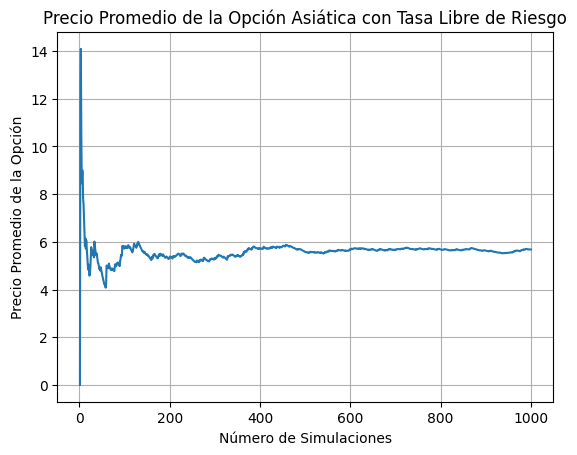

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la opción asiática
precio_subyacente = 100  # S0 Precio inicial del subyacente
precio_ejercicio = 100  # E Precio de ejercicio
tiempo = 1.0  # Tiempo hasta la expiración
n = 1000  # Número de pasos para el promedio
n_simulaciones = 1000  # Número de simulaciones
volatilidad = 0.2  # Volatilidad del subyacente
tasa_libre_riesgo = 0.05  # Tasa libre de riesgo
dt = tiempo / n # incremento en el tiempo
payoffs = []
precios_promedio = []

for _ in range(n_simulaciones):
    # Simulación de los precios subyacentes utilizando un proceso de difusión geométrica
    precios_subyacentes = [precio_subyacente]
    for _ in range(n):
        dt = tiempo / n
        drift = (tasa_libre_riesgo - 0.5 * volatilidad**2) * dt
        shock = volatilidad * np.random.normal() * np.sqrt(dt)
        precio_actual = precios_subyacentes[-1] * np.exp(drift + shock)
        precios_subyacentes.append(precio_actual)

    # Cálculo del promedio
    promedio_precios = np.mean(precios_subyacentes)

    # Cálculo del pay-off
    pay_off = max(promedio_precios - precio_ejercicio, 0)
    payoffs.append(pay_off)

    # Descuento del pay-off al valor presente ( T-t)
    pay_off_presente = pay_off * np.exp(-(tiempo-i*dt)*tasa_libre_riesgo )
    precios_promedio.append(pay_off_presente)

# Cálculo del precio promedio de la opción asiática
precio_promedio = np.mean(precios_promedio)

print(f"Precio promedio de la opción asiática: {precio_promedio}")

# Graficar el precio promedio en función del número de simulaciones
plt.plot(range(1, n_simulaciones + 1), np.cumsum(precios_promedio) / np.arange(1, n_simulaciones + 1))
plt.xlabel('Número de Simulaciones')
plt.ylabel('Precio Promedio de la Opción')
plt.title('Precio Promedio de la Opción Asiática con Tasa Libre de Riesgo')
plt.grid()
plt.show()


# ASIAN OPTION: CALL WITH GEOMETRIC MEAN

Asian Option Value: 5.6491


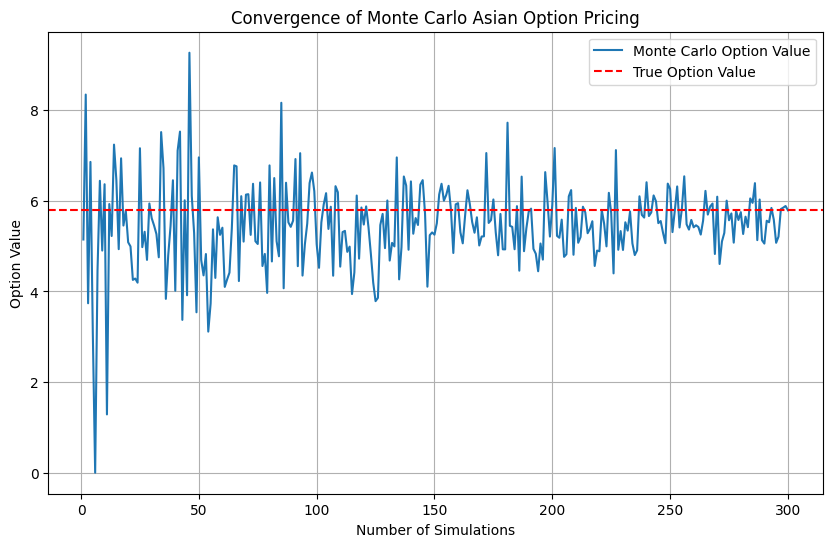

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Asian option value using Monte Carlo
def asian_option_geometric_mean(S0, K, T, r, sigma, n_simulations, n_steps):
    dt = T / n_steps
    simulations = np.zeros((n_simulations, n_steps + 1))

    for i in range(n_simulations):
        # Generate random samples
        Z = np.random.normal(0, 1, n_steps)
        S = [S0]

        # Simulate stock price path
        for j in range(n_steps):
            S_t = S[-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[j])
            S.append(S_t)

        simulations[i] = S

    # Calculate Asian option payoff
    asian_payoffs = np.maximum(0, np.exp(np.mean(np.log(simulations[:, 1:]), axis=1)) - K)

    # Discounted expected payoff
    option_value = np.exp(-r * T) * np.mean(asian_payoffs)

    return option_value

# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
T = 1.0   # Time to expiration
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility
n_simulations = 300  # Number of Monte Carlo simulations
n_steps = 252  # Number of time steps (daily observations for 1 year)

# Calculate Asian option value
option_value = asian_option_geometric_mean(S0, K, T, r, sigma, n_simulations, n_steps)
print(f'Asian Option Value: {option_value:.4f}')

# Convergence plot
values = []
for i in range(1, n_simulations + 1):
    option_value = asian_option_geometric_mean(S0, K, T, r, sigma, i, n_steps)
    values.append(option_value)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_simulations + 1), values, label='Monte Carlo Option Value')
plt.axhline(y=values[-1], color='red', linestyle='--', label='True Option Value')
plt.xlabel('Number of Simulations')
plt.ylabel('Option Value')
plt.legend()
plt.title('Convergence of Monte Carlo Asian Option Pricing')
plt.grid(True)
plt.show()


# # ASIAN OPTION: CALL WITH EWMA MEAN

Asian Option Price using EWMA Mean: 6.36895420973931


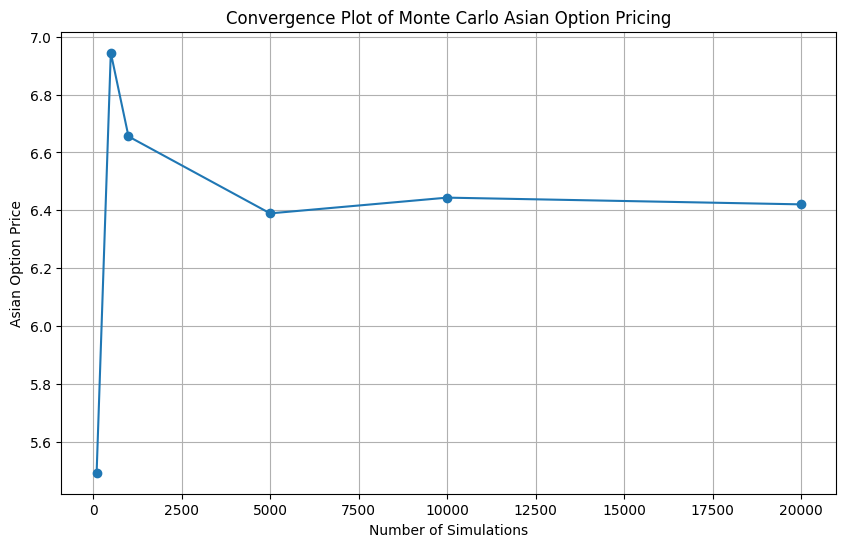

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asian option parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
T = 1.0       # Time to maturity
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility
N = 200       # Number of averaging periods
M = 3000     # Number of Monte Carlo simulations
l=2/N         # l > 1/N
# Function to calculate Asian option value using EWMA mean
def asian_option_ewma(S0, K, T, r, sigma, N, M,l):
    dt = T / N
    ewma_mean = S0
    option_values = []

    for _ in range(M):
        S = S0
        average = S0

        for _ in range(1, N + 1):
            z = np.random.standard_normal()
            S *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
            average = (1 - l) * average + (l) * S

        payoff = max(average - K, 0)
        option_values.append(payoff)

    option_price = np.exp(-r * T) * np.mean(option_values)
    return option_price

# Calculate Asian option value using EWMA mean
asian_option_price = asian_option_ewma(S0, K, T, r, sigma, N, M,l)
print("Asian Option Price using EWMA Mean:", asian_option_price)

# Convergence plot using the Monte Carlo method
sample_sizes = [100, 500, 1000, 5000, 10000, 20000]
option_prices = []

for size in sample_sizes:
    option_price = asian_option_ewma(S0, K, T, r, sigma, N, size,l)
    option_prices.append(option_price)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, option_prices, marker='o')
plt.xlabel("Number of Simulations")
plt.ylabel("Asian Option Price")
plt.title("Convergence Plot of Monte Carlo Asian Option Pricing")
plt.grid(True)
plt.show()


Asian Option Price using EWMA Mean: 4.167911033447539


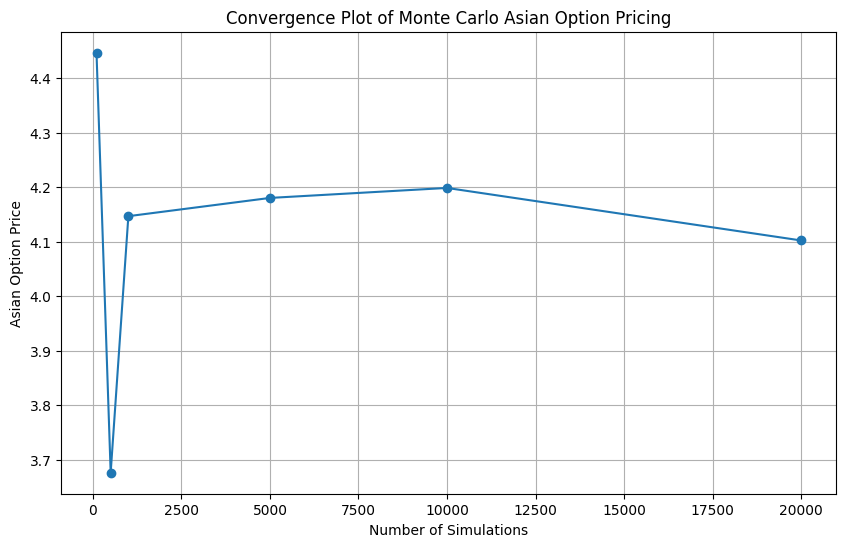

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asian option parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
T = 1.0       # Time to maturity
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility
N = 200       # Number of averaging periods
M = 3000     # Number of Monte Carlo simulations
l=1/N
# Function to calculate Asian option value using EWMA mean
def asian_option_ewma(S0, K, T, r, sigma, N, M,l):
    dt = T / N
    ewma_mean = S0
    option_values = []

    for _ in range(M):
        S = S0
        average = S0

        for _ in range(1, N + 1):
            z = np.random.standard_normal()
            S *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
            average = (1 - l) * average + (l) * S

        payoff = max(average - K, 0)
        option_values.append(payoff)

    option_price = np.exp(-r * T) * np.mean(option_values)
    return option_price

# Calculate Asian option value using EWMA mean
asian_option_price = asian_option_ewma(S0, K, T, r, sigma, N, M,l)
print("Asian Option Price using EWMA Mean:", asian_option_price)

# Convergence plot using the Monte Carlo method
sample_sizes = [100, 500, 1000, 5000, 10000, 20000]
option_prices = []

for size in sample_sizes:
    option_price = asian_option_ewma(S0, K, T, r, sigma, N, size,l)
    option_prices.append(option_price)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, option_prices, marker='o')
plt.xlabel("Number of Simulations")
plt.ylabel("Asian Option Price")
plt.title("Convergence Plot of Monte Carlo Asian Option Pricing")
plt.grid(True)
plt.show()


# EWMA CON L < 1/N

Asian Option Price using EWMA Mean: 2.4359363156662437


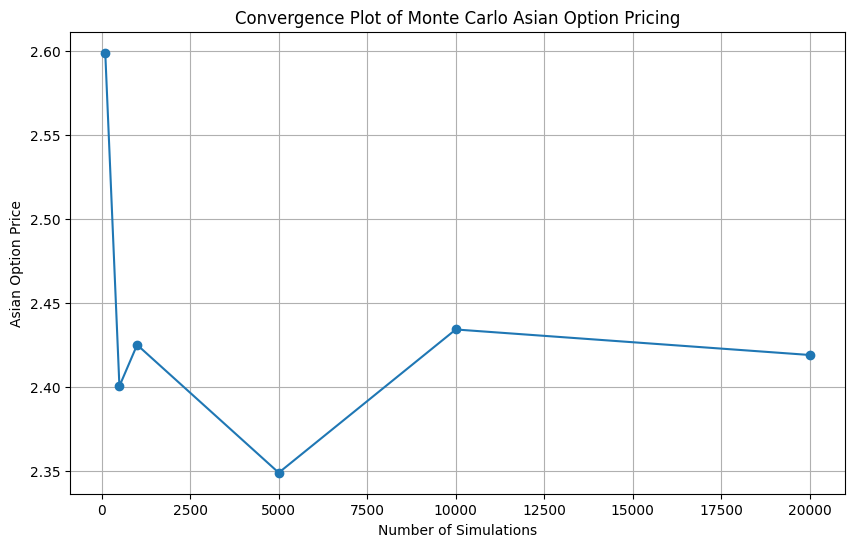

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asian option parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
T = 1.0       # Time to maturity
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility
N = 100       # Number of averaging periods
M = 10000     # Number of Monte Carlo simulations
l=0.5/N
# Function to calculate Asian option value using EWMA mean
def asian_option_ewma(S0, K, T, r, sigma, N, M,l):
    dt = T / N
    ewma_mean = S0
    option_values = []

    for _ in range(M):
        S = S0
        average = S0

        for _ in range(1, N + 1):
            z = np.random.standard_normal()
            S *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
            average = (1 - l) * average + (l) * S

        payoff = max(average - K, 0)
        option_values.append(payoff)

    option_price = np.exp(-r * T) * np.mean(option_values)
    return option_price

# Calculate Asian option value using EWMA mean
asian_option_price = asian_option_ewma(S0, K, T, r, sigma, N, M,l)
print("Asian Option Price using EWMA Mean:", asian_option_price)

# Convergence plot using the Monte Carlo method
sample_sizes = [100, 500, 1000, 5000, 10000, 20000]
option_prices = []

for size in sample_sizes:
    option_price = asian_option_ewma(S0, K, T, r, sigma, N, size,l)
    option_prices.append(option_price)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, option_prices, marker='o')
plt.xlabel("Number of Simulations")
plt.ylabel("Asian Option Price")
plt.title("Convergence Plot of Monte Carlo Asian Option Pricing")
plt.grid(True)
plt.show()


# PUT ASIÁTICO

Precio promedio de la opción asiática: 3.5969541998608165


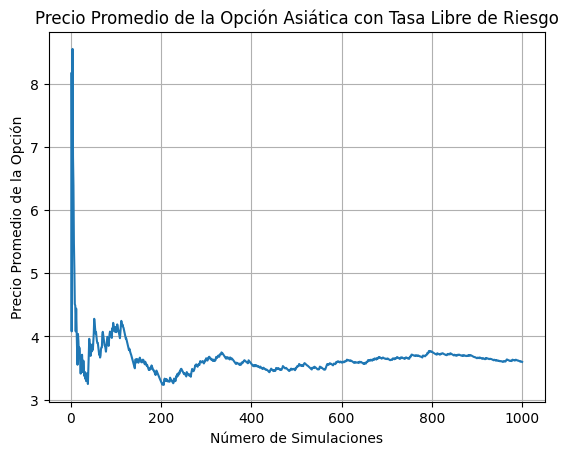

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la opción asiática
precio_subyacente = 100  # S0 Precio inicial del subyacente
precio_ejercicio = 100  # E Precio de ejercicio
tiempo = 1.0  # Tiempo hasta la expiración
n = 1000  # Número de pasos para el promedio
n_simulaciones = 1000  # Número de simulaciones
volatilidad = 0.2  # Volatilidad del subyacente
tasa_libre_riesgo = 0.05  # Tasa libre de riesgo
dt = tiempo / n # incremento en el tiempo
payoffs = []
precios_promedio = []

for _ in range(n_simulaciones):
    # Simulación de los precios subyacentes utilizando un proceso de difusión geométrica
    precios_subyacentes = [precio_subyacente]
    for _ in range(n):
        dt = tiempo / n
        drift = (tasa_libre_riesgo - 0.5 * volatilidad**2) * dt
        shock = volatilidad * np.random.normal() * np.sqrt(dt)
        precio_actual = precios_subyacentes[-1] * np.exp(drift + shock)
        precios_subyacentes.append(precio_actual)

    # Cálculo del promedio
    promedio_precios = np.mean(precios_subyacentes)

    # Cálculo del pay-off
    pay_off = max(precio_ejercicio - promedio_precios , 0)
    payoffs.append(pay_off)

    # Descuento del pay-off al valor presente ( T-t)
    pay_off_presente = pay_off * np.exp(-(tiempo-i*dt)*tasa_libre_riesgo )
    precios_promedio.append(pay_off_presente)

# Cálculo del precio promedio de la opción asiática
precio_promedio = np.mean(precios_promedio)

print(f"Precio promedio de la opción asiática: {precio_promedio}")

# Graficar el precio promedio en función del número de simulaciones
plt.plot(range(1, n_simulaciones + 1), np.cumsum(precios_promedio) / np.arange(1, n_simulaciones + 1))
plt.xlabel('Número de Simulaciones')
plt.ylabel('Precio Promedio de la Opción')
plt.title('Precio Promedio de la Opción Asiática con Tasa Libre de Riesgo')
plt.grid()
plt.show()

In [ ]:
for _ in range(3):
  x=np.random.normal(3,4,1)
  print(x)

[2.34564143]
[2.79929278]
[6.08251362]


# CALL LOOKBACK

Precio promedio de la opción de lookback: 13.613370729281447


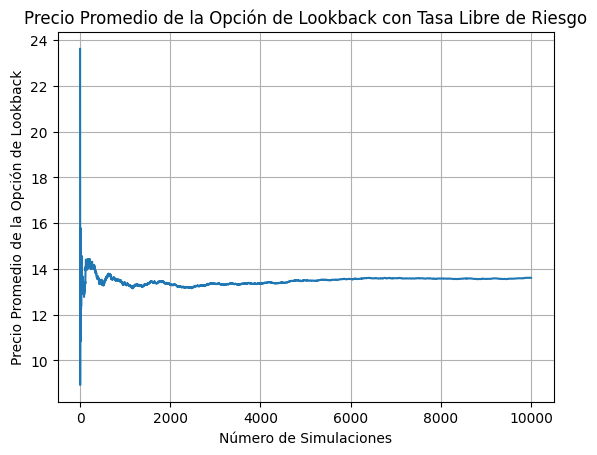

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la opción de lookback
precio_subyacente = 100  # Precio inicial del subyacente
tiempo = 1.0  # Tiempo hasta la expiración
n = 100  # Número de pasos para la simulación
n_simulaciones = 10000  # Número de simulaciones
volatilidad = 0.2  # Volatilidad del subyacente
tasa_libre_riesgo = 0.05  # Tasa libre de riesgo

payoffs = []
precios_lookback = []

for _ in range(n_simulaciones):
    # Simulación de los precios subyacentes utilizando un proceso de difusión geométrica
    precios_subyacentes = [precio_subyacente]
    precio_maximo = precio_subyacente  # Precio máximo inicial
    for i in range(n):
        dt = tiempo / n
        drift = (tasa_libre_riesgo - 0.5 * volatilidad**2) * dt
        shock = volatilidad * np.random.normal() * np.sqrt(dt)
        precio_actual = precios_subyacentes[-1] * np.exp(drift + shock)
        precios_subyacentes.append(precio_actual)
        # Actualizar el precio máximo si es necesario
        precio_maximo = max(precio_maximo, precio_actual)

    # Cálculo del pay-off de lookback
    pay_off = max(precio_maximo - precio_actual,0)
    payoffs.append(pay_off)

    # Descuento del pay-off al valor presente
    pay_off_presente = pay_off * np.exp(-(tiempo-i*dt)*tasa_libre_riesgo * tiempo)
    precios_lookback.append(pay_off_presente)

# Cálculo del precio promedio de la opción de lookback
precio_promedio = np.mean(precios_lookback)

print(f"Precio promedio de la opción de lookback: {precio_promedio}")

# Graficar el precio promedio en función del número de simulaciones
plt.plot(range(1, n_simulaciones + 1), np.cumsum(precios_lookback) / np.arange(1, n_simulaciones + 1))
plt.xlabel('Número de Simulaciones')
plt.ylabel('Precio Promedio de la Opción de Lookback')
plt.title('Precio Promedio de la Opción de Lookback con Tasa Libre de Riesgo')
plt.grid()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

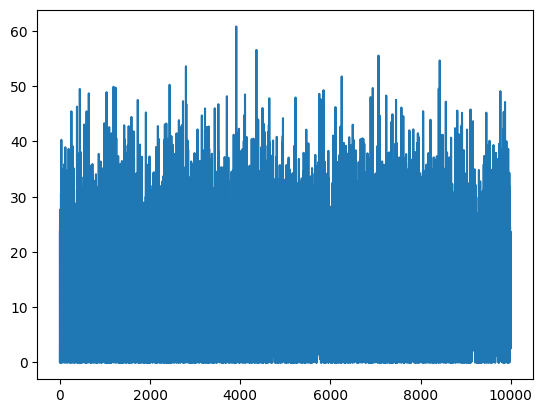

In [ ]:
precios_lookback

plt.plot(precios_lookback)
plt.show


# PUT LOOKBACK

Precio promedio de la opción de lookback: 17.20206528003115


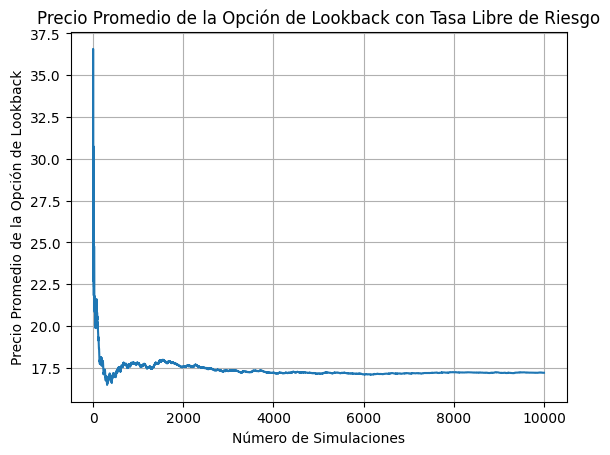

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la opción de lookback
precio_subyacente = 100  # Precio inicial del subyacente
tiempo = 1.0  # Tiempo hasta la expiración
n = 100  # Número de pasos para la simulación
n_simulaciones = 10000  # Número de simulaciones
volatilidad = 0.2  # Volatilidad del subyacente
tasa_libre_riesgo = 0.05  # Tasa libre de riesgo

payoffs = []
precios_lookback = []

for _ in range(n_simulaciones):
    # Simulación de los precios subyacentes utilizando un proceso de difusión geométrica
    precios_subyacentes = [precio_subyacente]
    precio_minimo = precio_subyacente  # Precio máximo inicial
    for i in range(n):
        dt = tiempo / n
        drift = (tasa_libre_riesgo - 0.5 * volatilidad**2) * dt
        shock = volatilidad * np.random.normal() * np.sqrt(dt)
        precio_actual = precios_subyacentes[-1] * np.exp(drift + shock)
        precios_subyacentes.append(precio_actual)
        # Actualizar el precio máximo si es necesario
        precio_minimo = min(precio_minimo, precio_actual)

    # Cálculo del pay-off de lookback
    pay_off = precio_actual - precio_minimo
    payoffs.append(pay_off)

    # Descuento del pay-off al valor presente
    pay_off_presente = pay_off * np.exp(-(tiempo-i*dt)*tasa_libre_riesgo * tiempo)
    precios_lookback.append(pay_off_presente)

# Cálculo del precio promedio de la opción de lookback
precio_promedio = np.mean(precios_lookback)

print(f"Precio promedio de la opción de lookback: {precio_promedio}")

# Graficar el precio promedio en función del número de simulaciones
plt.plot(range(1, n_simulaciones + 1), np.cumsum(precios_lookback) / np.arange(1, n_simulaciones + 1))
plt.xlabel('Número de Simulaciones')
plt.ylabel('Precio Promedio de la Opción de Lookback')
plt.title('Precio Promedio de la Opción de Lookback con Tasa Libre de Riesgo')
plt.grid()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

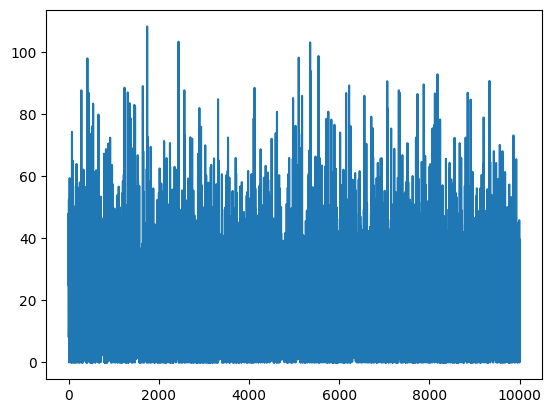

In [ ]:
precios_lookback

plt.plot(precios_lookback)
plt.show